# Value Investing with Python - Part 05

This notebook belongs to part five of the **Value Investing with Python**-series. It contains two functions to visually evaluate data (metrics). The first function allows to evaluate a single metric, while the second function is able to visualize several metrics in one plot. Hence, the second function enables comparisons between different metrics.

The first function has three inputs:
* metric_series: series object containing Morningstar data of one single metric
* period_in_years: evaluation period, number of years as integer
* plot_title: **optional** header for plot

The second function has also three inputs:
* list_of_metrics: list with series objects containing Morningstar data
* period_in_years: evaluation period, number of years as integer
* plot_title: header for plot

Both functions output matplotlib-plots.

In [1]:
def single_metric_eval(metric_series, period_in_years, plot_title = None):
    
    # Function to visualize the relevant metrics' development over a specified period.
    # E.g.: period_in_years = 3 --> last three years are examined.
    
    # Input:
    ## metric_series: Series with metric's values
    ## period_in_years: integer
    # Output: matplotlib line plot directly shown on screen
    
    # Import required modules:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.ticker import StrMethodFormatter
    
    # Check the input period:
    if period_in_years < 1 or period_in_years > 10:
        print("Invalid period.")
        return
    
    # Create series containing data for the specified period:
    metric_series_period = metric_series[-(period_in_years):]
    
    # Calculate median value for that period. If more than 50% of datapoints are NaN, median value won't be displayed:
    if pd.isna(metric_series_period).sum() < len(metric_series) * 0.5:
        median_value = np.nanmedian(metric_series_period)
    
    fig, ax = plt.subplots(figsize = (12, 6))
    ax.plot(metric_series_period)
    
    if plot_title == None:
        ax.set_title(metric_series.name)
    else:
        ax.set_title(plot_title)

    if median_value > 100:
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    elif "cap_ex_mil" in metric_series.name:
        ax.invert_yaxis()
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    else:
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    
    ax.axhline(median_value, color = "red", label = "Period Median")
    ax.grid(visible = True, axis = 'y')
    ax.legend(loc = 'upper left')
    plt.show()

In [2]:
def metric_comparison(list_of_metrics, period_in_years, plot_title):
    
    # Function to visualize the development of more than one metric over a specified period in one single plot.
    # E.g.: period_in_years = 3 --> last three years are examined. 
    
    # Input:
    ## metric_series: Series with metric's values
    ## period_in_years: period as integer
    ## plot_title: plot title as string
    # Output: matplotlib line plot directly shown on screen
    
    # Import required modules:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.ticker import StrMethodFormatter
    
    # Check the input period:
    if (period_in_years < 1) or (period_in_years > 10):
        print("Invalid period.")
        return
    
    fig, ax = plt.subplots(figsize = (12, 6))
    ax.set_title(plot_title)
    
    for metric in list_of_metrics:
        # Create series containing data for the specified period:
        metric_period = metric[-(period_in_years):] 
        ax.plot(metric_period, label = metric.name)
    
    if metric.describe()['50%'] <= 100:
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f}'))
    else:
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    
    ax.grid(visible = True, axis='y')
    ax.legend(loc = 'upper left')
    plt.show()

To illustrate an example, one has to use the function from the **(updated)** part two:

In [3]:
import nbimporter
import datetime

In [4]:
from VIPy_02_GetModifyMorningstarData import *

In [5]:
apple_data = get_modify_morningstar_data("AAPL", "XNAS")

First function to visualize **Revenue**:

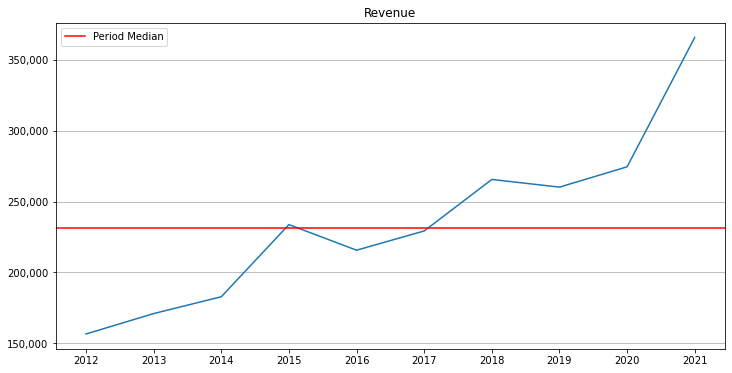

In [8]:
single_metric_eval(apple_data["revenue_mil"], 10, "Revenue")

First function to visualize **CapEx**:

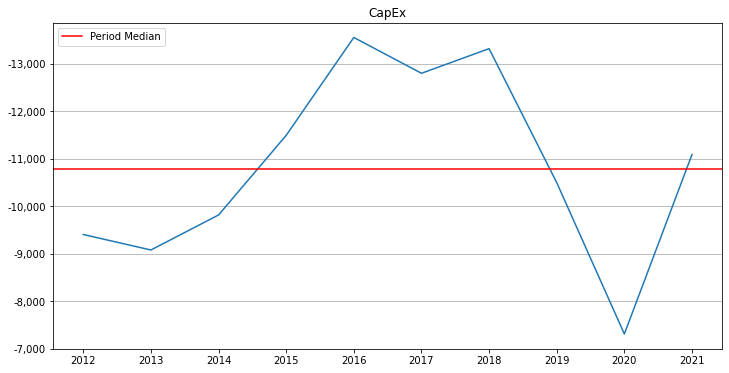

In [9]:
single_metric_eval(apple_data["cap_ex_mil"], 10, "CapEx")

Second function to visualize and compare **margin-metrics**:

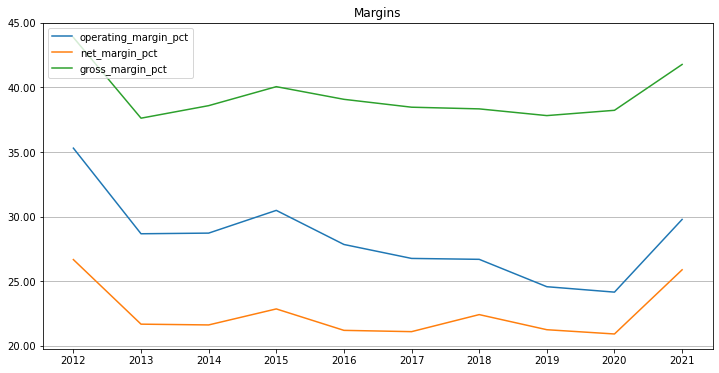

In [10]:
metric_comparison([apple_data["operating_margin_pct"], apple_data["net_margin_pct"],
                   apple_data["gross_margin_pct"]], 10, "Margins")